In [1]:
################################################
########## COUNTING WORDS AND PHRASES ##########
################################################

In [2]:
#All these packages need to be installed from pip
import gensim#For word2vec, etc
import requests #For downloading our datasets
import lucem_illud_2020

import numpy as np #For arrays
import pandas as pd #Gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import seaborn #Makes the graphics look nicer
import sklearn.metrics.pairwise #For cosine similarity
import sklearn.manifold #For T-SNE
import sklearn.decomposition #For PCA

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

import os #For looking through files
import os.path #For managing file paths

In [3]:
# read in dataframes separated by year
movie_df_1940_2020 = pd.read_csv("/Users/laurenbeard/Desktop/compContentAnalysis/Content-Analysis-2020/final/movie_df_1940_2020.csv") 
movie_df_1940_1960 = pd.read_csv("/Users/laurenbeard/Desktop/compContentAnalysis/Content-Analysis-2020/final/movie_df_1940_1960.csv")
movie_df_1960_1980 = pd.read_csv("/Users/laurenbeard/Desktop/compContentAnalysis/Content-Analysis-2020/final/movie_df_1960_1980.csv")
movie_df_1980_2000 = pd.read_csv("/Users/laurenbeard/Desktop/compContentAnalysis/Content-Analysis-2020/final/movie_df_1980_2000.csv")
movie_df_2000_2020 = pd.read_csv("/Users/laurenbeard/Desktop/compContentAnalysis/Content-Analysis-2020/final/movie_df_2000_2020.csv")

In [4]:
##############################
########## WORD2VEC ##########
##############################

In [5]:
movie_df_2000_2020['tokenized_sents'] = movie_df_2000_2020['Text'].apply(lambda x: [lucem_illud_2020.word_tokenize(s) for s in lucem_illud_2020.sent_tokenize(x)])
movie_df_2000_2020['normalized_sents'] = movie_df_2000_2020['tokenized_sents'].apply(lambda x: [lucem_illud_2020.normalizeTokens(s) for s in x])

In [6]:
movieW2V_2000_2020 = gensim.models.word2vec.Word2Vec(movie_df_2000_2020['normalized_sents'].sum())

In [7]:
movieW2V_2000_2020.wv.index2entity[:10]

['know', 'be', 'yes', 'come', 'like', 'get', 'right', 'think', 'oh', 'okay']

In [8]:
movieW2V_2000_2020.most_similar('good')

[('bad', 0.8280739784240723),
 ('nighty', 0.7530741691589355),
 ('amaze', 0.7247777581214905),
 ('excite', 0.7223174571990967),
 ('ksi', 0.7185305953025818),
 ('lovely', 0.7157480120658875),
 ('friday', 0.7129403352737427),
 ('shitheel', 0.7020125389099121),
 ('wake', 0.6996279954910278),
 ('saturday', 0.699553906917572)]

In [9]:
movieW2V_2000_2020.doesnt_match(['good', 'love', 'want', 'thank'])

'want'

In [10]:
movieW2V_2000_2020.save("movieWORD2Vec_2000_2020")

In [11]:
numWords_2000_2020 = 10
targetWords_2000_2020 = movieW2V_2000_2020.wv.index2word[:numWords_2000_2020]

In [14]:
# extract their vectors and create our own smaller matrix that preserved the distances from the original:
wordsSubMatrix_2000_2020 = []
for word in targetWords_2000_2020:
    wordsSubMatrix_2000_2020.append(movieW2V_2000_2020[word])
wordsSubMatrix_2000_2020 = np.array(wordsSubMatrix_2000_2020)
wordsSubMatrix_2000_2020

array([[-5.43218255e-01, -7.41809130e-01, -5.78817010e-01,
         2.77319938e-01, -1.80656314e-01, -2.17103288e-01,
        -3.60455960e-01, -2.45207176e-01, -1.74238622e-01,
        -1.49946824e-01, -2.43790060e-01, -2.24270806e-01,
         7.93370068e-01, -3.55102241e-01,  2.10617017e-02,
         3.43083516e-02,  7.02836871e-01,  1.74556404e-01,
        -8.32714215e-02, -1.69155717e-01,  1.68538436e-01,
         4.25528497e-01, -4.29414004e-01,  6.43021055e-03,
        -1.53307736e-01, -1.21932462e-01, -2.92412966e-01,
         4.65005964e-01,  1.66319367e-02,  2.34705240e-01,
         2.62469977e-01,  3.29091191e-01, -3.33141595e-01,
         5.88707209e-01,  2.51877278e-01,  5.00013709e-01,
         1.31172076e-01,  1.83273792e-01, -4.33838189e-01,
        -9.78725404e-02,  2.29685735e-02,  1.16695380e-02,
        -2.80113488e-01,  1.15232460e-01, -1.79842234e-01,
         6.10522747e-01, -3.49861741e-01,  3.59077781e-01,
        -1.13629758e-01, -2.07764745e-01,  7.85158798e-0

In [15]:
# use PCA to reduce the dimesions (e.g., to 50), and T-SNE to project them down to the two we will visualize
pcaWords_2000_2020 = sklearn.decomposition.PCA(n_components = 10).fit(wordsSubMatrix_2000_2020)
reducedPCA_data_2000_2020 = pcaWords_2000_2020.transform(wordsSubMatrix_2000_2020)
#T-SNE is theoretically better, but you should experiment
tsneWords_2000_2020 = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_data_2000_2020)

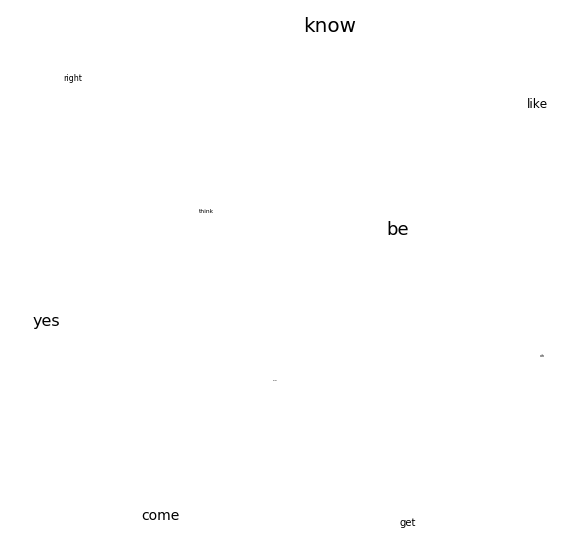

In [16]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWords_2000_2020[:, 0], tsneWords_2000_2020[:, 1], alpha = 0)#Making the points invisible 
for i, word in enumerate(targetWords_2000_2020):
    ax.annotate(word, (tsneWords_2000_2020[:, 0][i],tsneWords_2000_2020[:, 1][i]), size =  20 * (numWords_2000_2020 - i) / numWords_2000_2020)
plt.xticks(())
plt.yticks(())
plt.show()

In [17]:
#############################
########## DOC2VEC ##########
#############################

In [18]:
# We will load these as documents into Word2Vec, but first we need to normalize and pick some tags.
keywords = ['good', 'bad', 'kill', 'save', 'stop', 'fight','beat','man','woman','miss','mr','mother','dad','good','right','wrong']

In [19]:
taggedDocs_2000_2020 = []
for index, row in movie_df_2000_2020.iterrows():
    #Just doing a simple keyword assignment
    docKeywords_2000_2020 = [s for s in keywords if s in row['normalized_words']]
    docKeywords_2000_2020.append(row['Year'])
    docKeywords_2000_2020.append(row['Movie Name']) #This lets us extract individual documnets since doi's are unique
    taggedDocs_2000_2020.append(gensim.models.doc2vec.LabeledSentence(words = row['normalized_words'], tags = docKeywords_2000_2020))
movie_df_2000_2020['TaggedAbstracts'] = taggedDocs_2000_2020

In [20]:
movieD2V_2000_2020 = gensim.models.doc2vec.Doc2Vec(movie_df_2000_2020['TaggedAbstracts'], size = 50) #Limiting to 50 dimensions

/opt/anaconda3/lib/python3.7/site-packages/gensim/models/doc2vec.py:574: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [21]:
movieD2V_2000_2020.docvecs.most_similar([ movieD2V_2000_2020['kill'] ], topn=5 )

[('kill', 0.9999999403953552),
 ('From Time to Time', 0.4255041182041168),
 (309, 0.407075971364975),
 (914, 0.40278708934783936),
 (595, 0.3931695818901062)]

In [29]:
################################
########## PROJECTION ##########
################################

In [30]:
#words to create dimensions
tnytTargetWords = ['good','bad','fight', 'kill', 'save', 'stop']
#words we will be mapping
tnytTargetWords += ["man","woman","old","money","right", "know","come"]

In [31]:
wordsSubMatrix_2000_2020 = []
for word in tnytTargetWords:
    wordsSubMatrix_2000_2020.append(movieW2V_2000_2020[word])
wordsSubMatrix_2000_2020 = np.array(wordsSubMatrix_2000_2020)

In [34]:
pcaWordsMovie_2000_2020 = sklearn.decomposition.PCA(n_components = 10).fit(wordsSubMatrix_2000_2020)
reducedPCA_dataMovie_2000_2020 = pcaWordsMovie_2000_2020.transform(wordsSubMatrix_2000_2020)
#T-SNE is theoretically better, but you should experiment
tsneWordsMovie_2000_2020 = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_dataMovie_2000_2020)

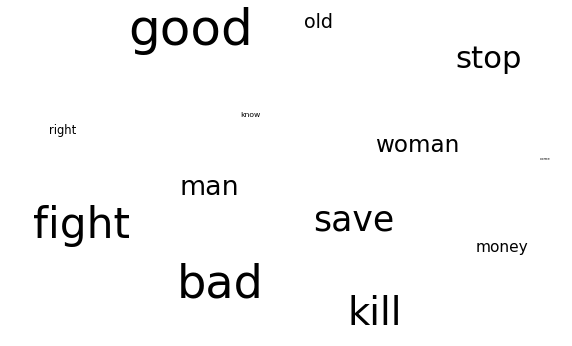

In [35]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWordsMovie_2000_2020[:, 0], tsneWordsMovie_2000_2020[:, 1], alpha = 0) #Making the points invisible
for i, word in enumerate(tnytTargetWords):
    ax.annotate(word, (tsneWordsMovie_2000_2020[:, 0][i],tsneWordsMovie_2000_2020[:, 1][i]), size =  50 * (len(tnytTargetWords) - i) / len(tnytTargetWords))
plt.xticks(())
plt.yticks(())
plt.show()

In [36]:
# Define some convenient functions for getting dimensions.
def normalize(vector):
    normalized_vector = vector / np.linalg.norm(vector)
    return normalized_vector

def dimension(model, positives, negatives):
    diff = sum([normalize(model[x]) for x in positives]) - sum([normalize(model[y]) for y in negatives])
    return diff

In [37]:
# Let's calculate 2 dimensions: violence and nonviolence
violence_2000_2020 = dimension(movieW2V_2000_2020, ['bad'], ['fight','kill'])
nonviolence_2000_2020 = dimension(movieW2V_2000_2020, ['good'], ['save','stop'])

In [38]:
# words around gender and incentives
gender = ["man","woman"]
incentive = ["money","know","right"]

In [41]:
# Define a function to project words in a word list to each of the 2 dimensions
def makeDF(model, word_list):
    n = []
    v = []
    for word in word_list:
        n.append(sklearn.metrics.pairwise.cosine_similarity(movieW2V_2000_2020[word].reshape(1,-1), violence_2000_2020.reshape(1,-1))[0][0])
        v.append(sklearn.metrics.pairwise.cosine_similarity(movieW2V_2000_2020[word].reshape(1,-1), nonviolence_2000_2020.reshape(1,-1))[0][0])
    df = pd.DataFrame({'nonviolence': n, 'violence': v}, index = word_list)
    return df

In [42]:
# Get the projections.
genderdf_2000_2020 = makeDF(movieW2V_2000_2020, gender) 
incentivedf_2000_2020 = makeDF(movieW2V_2000_2020, incentive)

In [43]:
# Define some useful functions for plotting.
def Coloring(Series):
    x = Series.values
    y = x-x.min()
    z = y/y.max()
    c = list(plt.cm.rainbow(z))
    return c

def PlotDimension(ax,df, dim):
    ax.set_frame_on(False)
    ax.set_title(dim, fontsize = 20)
    colors = Coloring(df[dim])
    for i, word in enumerate(df.index):
        ax.annotate(word, (0, df[dim][i]), color = colors[i], alpha = 0.6, fontsize = 12)
    MaxY = df[dim].max()
    MinY = df[dim].min()
    plt.ylim(MinY,MaxY)
    plt.yticks(())
    plt.xticks(())

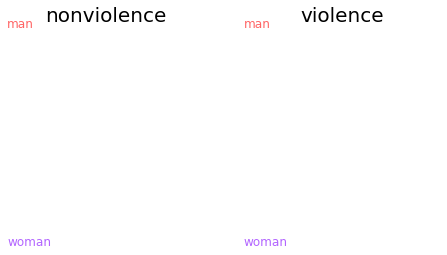

In [44]:
# Plot the gender words in the 2 dimensions 
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, genderdf_2000_2020, 'nonviolence')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, genderdf_2000_2020, 'violence')
plt.show()

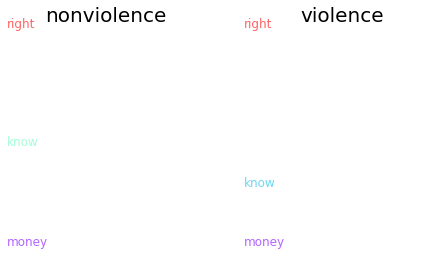

In [45]:
# Plot the incentive words in the dimensions
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, incentivedf_2000_2020, 'nonviolence')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, incentivedf_2000_2020, 'violence')
plt.show()